<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [2]:
df = pd.read_csv('states_edu.csv')

Chosen test: Math for 4 grade

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [3]:
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
# I want all my rows to have average math 4 score data, so I remove rows missing AVG_MATH_4_SCORE
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [4]:
# let's create a new variable which represents total expenditure per student
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL']


Final feature list: SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT, 

Feature selection justification: 'TOTAL_EXPENDITURE_PER_STUDENT': how much money is spent on a student's education will likely affect the quality of the education they get, 'AVG_MATH_8_SCORE': how older students perform on the math test is relevant because they also likely went through the same education in 4th grade

<h2> EDA </h2>

Visualization 1

Text(0, 0.5, '4th grade math score')

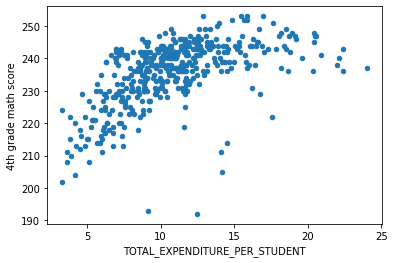

In [5]:
df.plot.scatter(x='TOTAL_EXPENDITURE_PER_STUDENT',y='AVG_MATH_4_SCORE')
plt.xlabel('TOTAL_EXPENDITURE_PER_STUDENT')
plt.ylabel('4th grade math score')

average 4th grade math score vs Total expendure per student

There is some positive correlation between the two, therefore 

Visualization 2

Text(0, 0.5, '4th grade math score')

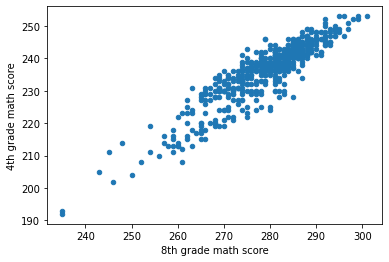

In [6]:
df.plot.scatter(x='AVG_MATH_8_SCORE',y='AVG_MATH_4_SCORE')
plt.xlabel('8th grade math score')
plt.ylabel('4th grade math score')

average 4th grade math score vs average 8th grade math score

There is a clear positive correlation between the two, so 8th grade math score is a good feature to choose for regression

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df[['AVG_MATH_8_SCORE','TOTAL_EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [9]:
# the test_size parameter defines what % of data is set aside for testing
# random_state ensures that I get the same results each time I run the code
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: REGRESSION

In [10]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [11]:
# create your model here
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
# R**2 value describes how well a linear model fits the data
model.score(X_test, y_test)

0.8842906940180094

In [15]:
# mean error
np.mean(model.predict(X_test)-y_test)

0.09750737851109324

In [16]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

3.1383204574882604

In [17]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

3.903771882220911

Text(0, 0.5, 'AVG_MATH_4_SCORE')

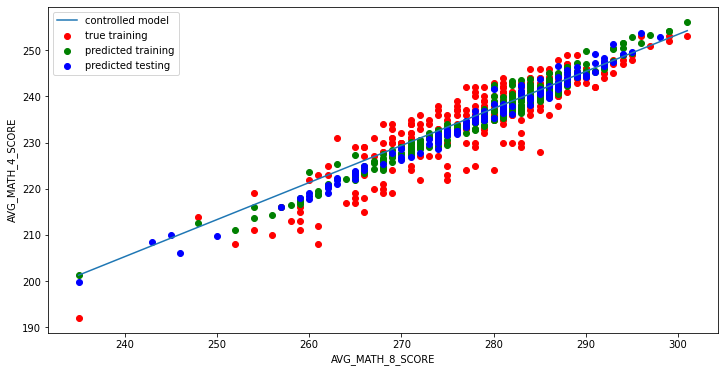

In [18]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'AVG_MATH_8_SCORE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')

<h2> Summary </h2>

I built a regression model that predicts average math score of 4th graders based on the average math score of 8th graders and total expediture per student from the same state and year. It's very likely that the 8th graders go through the same state's education as when they were 4th graders, therefore the average math score of 8th graders is a good predictor for average math score of 4th graders. In other words, if students are not doing well on math in 8th grade, they probably struggled with it in 4th grade. Total expenditure per student is not a strong predicter for average math score of 4th graders on its own, however it does contribute to a better R^2 score and lower error in combination with the average math score of 8th graders feature.